Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [4]:
df = pd.read_csv('insurance_dataset.csv')

In [5]:
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838


In [6]:
# Check basic statistics of numerical columns
print(df.describe())

                  age             bmi        children         charges
count  1000000.000000  1000000.000000  1000000.000000  1000000.000000
mean        41.495282       34.001839        2.499886    16735.117481
std         13.855189        9.231680        1.707679     4415.808211
min         18.000000       18.000000        0.000000     3445.011643
25%         29.000000       26.020000        1.000000    13600.372379
50%         41.000000       34.000000        2.000000    16622.127973
75%         53.000000       41.990000        4.000000    19781.465410
max         65.000000       50.000000        5.000000    32561.560374


In [7]:
# list of the columns in the dataframe 
print(df.columns)

Index(['age', 'gender', 'bmi', 'children', 'smoker', 'region',
       'medical_history', 'family_medical_history', 'exercise_frequency',
       'occupation', 'coverage_level', 'charges'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   age                     1000000 non-null  int64  
 1   gender                  1000000 non-null  object 
 2   bmi                     1000000 non-null  float64
 3   children                1000000 non-null  int64  
 4   smoker                  1000000 non-null  object 
 5   region                  1000000 non-null  object 
 6   medical_history         1000000 non-null  object 
 7   family_medical_history  1000000 non-null  object 
 8   exercise_frequency      1000000 non-null  object 
 9   occupation              1000000 non-null  object 
 10  coverage_level          1000000 non-null  object 
 11  charges                 1000000 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 91.6+ MB


In [9]:
#Check for missing values in each column
df.isnull().sum()

age                       0
gender                    0
bmi                       0
children                  0
smoker                    0
region                    0
medical_history           0
family_medical_history    0
exercise_frequency        0
occupation                0
coverage_level            0
charges                   0
dtype: int64

In [10]:
df

,age,gender,bmi,children,smoker,region,medical_history,family_medical_history,exercise_frequency,occupation,coverage_level,charges
0,46,male,21.45,5,yes,southeast,Diabetes,None,Never,Blue collar,Premium,20460.307669
1,25,female,25.38,2,yes,northwest,Diabetes,High blood pressure,Occasionally,White collar,Premium,20390.899218
2,38,male,44.88,2,yes,southwest,None,High blood pressure,Occasionally,Blue collar,Premium,20204.476302
3,25,male,19.89,0,no,northwest,None,Diabetes,Rarely,White collar,Standard,11789.029843
4,49,male,38.21,3,yes,northwest,Diabetes,High blood pressure,Rarely,White collar,Standard,19268.309838
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,59,male,46.67,2,no,northeast,High blood pressure,None,Frequently,Student,Basic,11584.134900
999996,33,male,36.83,2,no,northeast,None,High blood pressure,Frequently,Unemployed,Basic,9834.871456
999997,39,male,39.84,0,yes,northeast,Heart disease,High blood pressure,Rarely,Blue collar,Standard,22076.632856
999998,37,female,45.06,4,yes,northeast,High blood pressure,Diabetes,Occasionally,Unemployed,Premium,20297.618728


Exploratory Data Analysis (EDA)

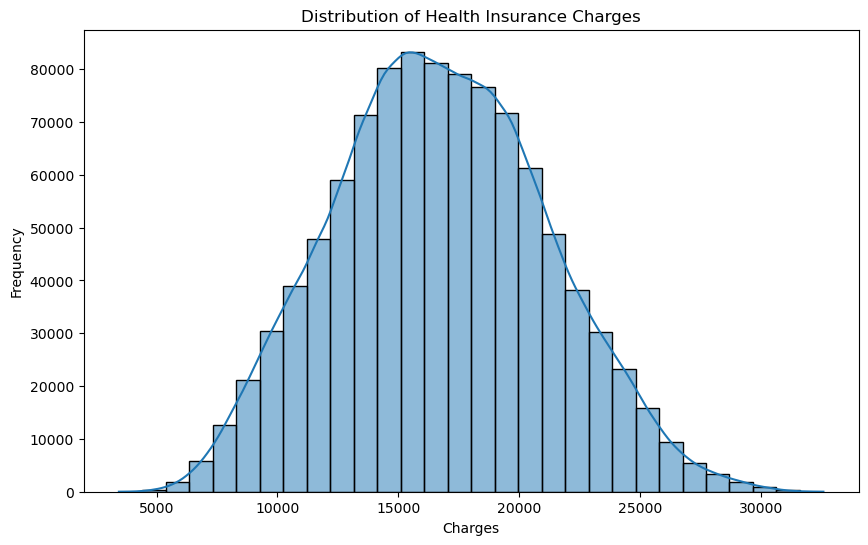

In [9]:
# Visualize the distribution of the target variable 'Charges'
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Distribution of Health Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

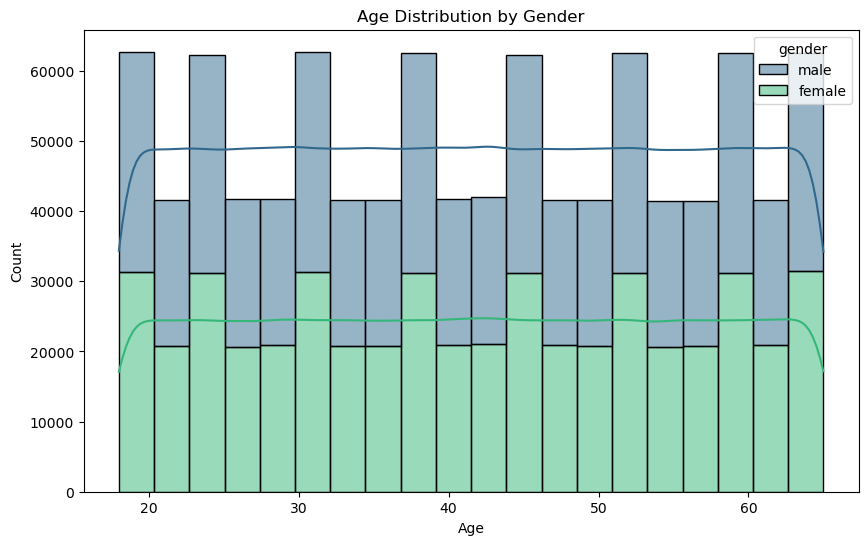

In [10]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', kde=True, bins=20, hue='gender', multiple='stack', palette='viridis')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

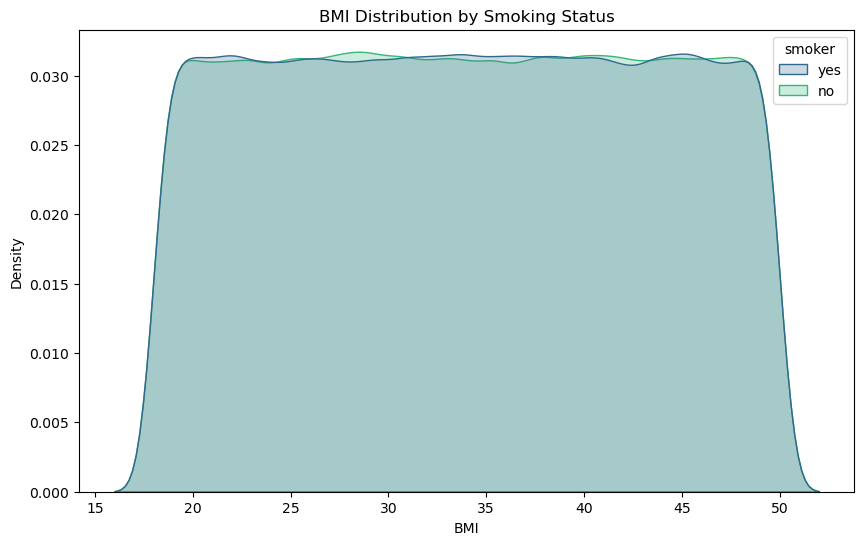

In [17]:
# BMI distribution
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='bmi', hue='smoker', fill=True, common_norm=False, palette='viridis')
plt.title('BMI Distribution by Smoking Status')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()

C:\Users\ayire\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


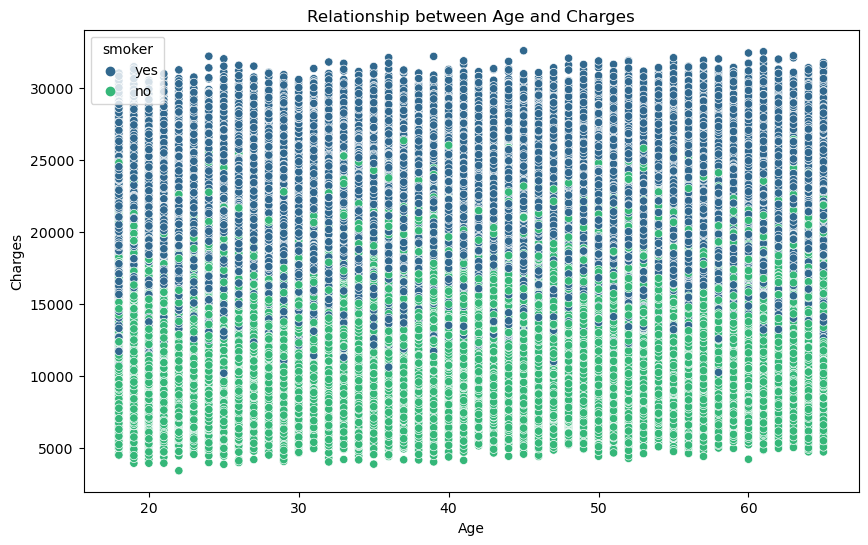

In [18]:
# Relationship between age and charges
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker', palette='viridis')
plt.title('Relationship between Age and Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

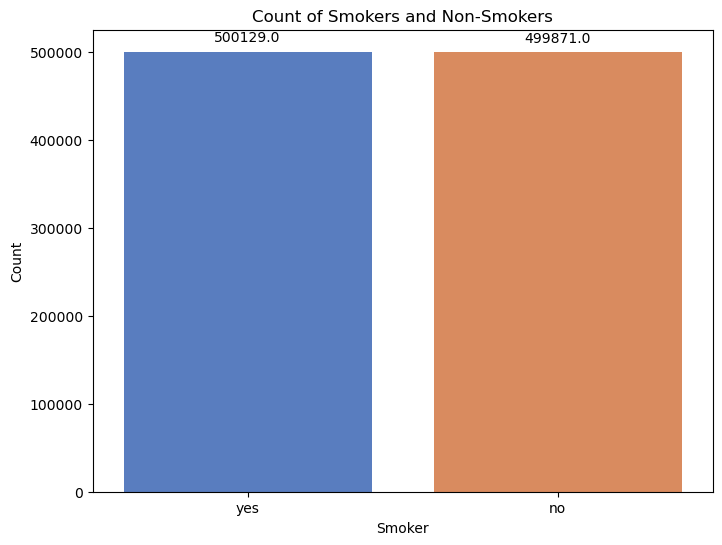

In [11]:
#smokers and non-smokers count
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='smoker', palette='muted')
# Adding annotations with total count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Count of Smokers and Non-Smokers')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


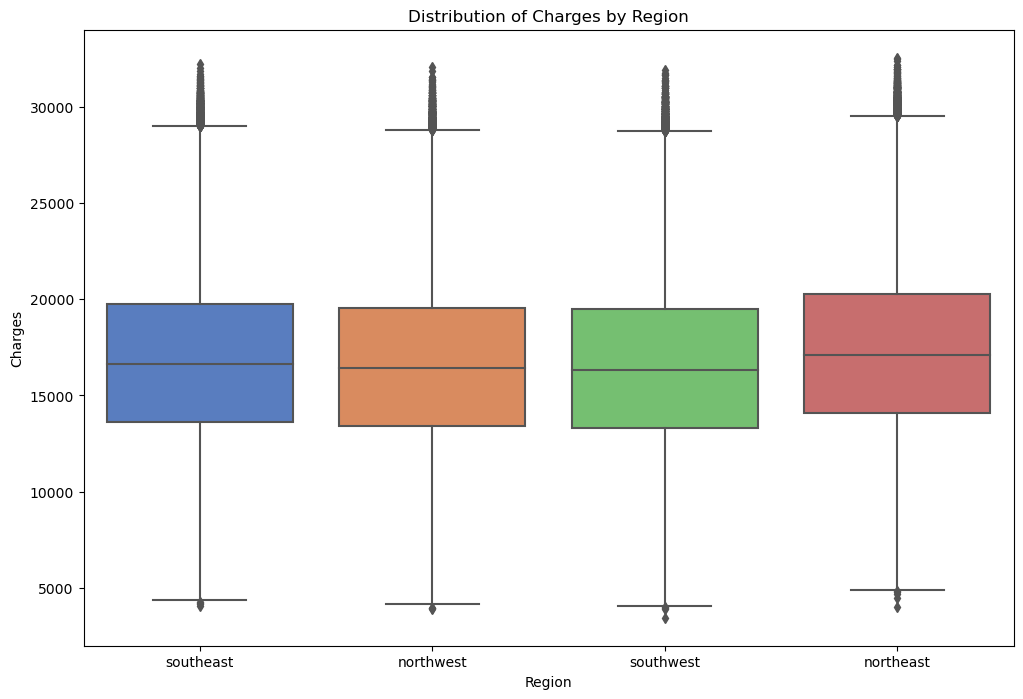

In [14]:
# Distribution of charges by region
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='region', y='charges', palette='muted')
plt.title('Distribution of Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


C:\Users\ayire\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


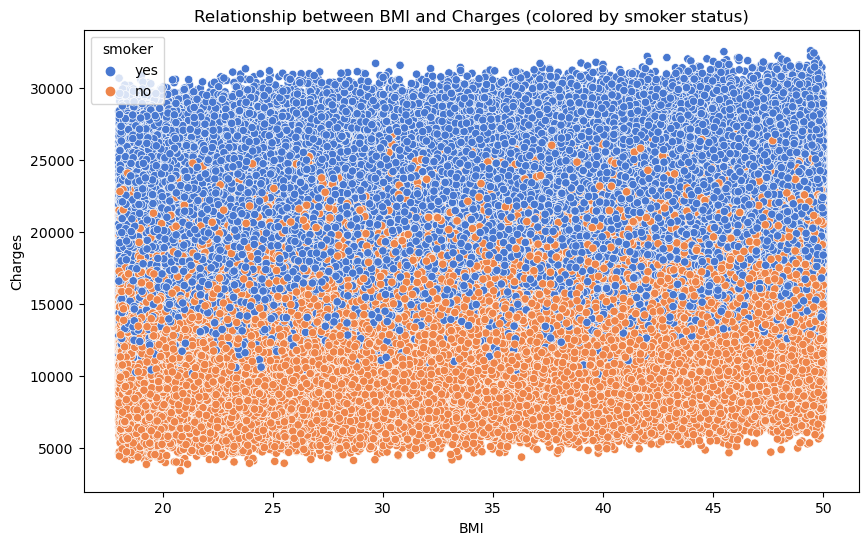

In [21]:
# Relationship between BMI and charges colored by smoker status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker', palette='muted')
plt.title('Relationship between BMI and Charges (colored by smoker status)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

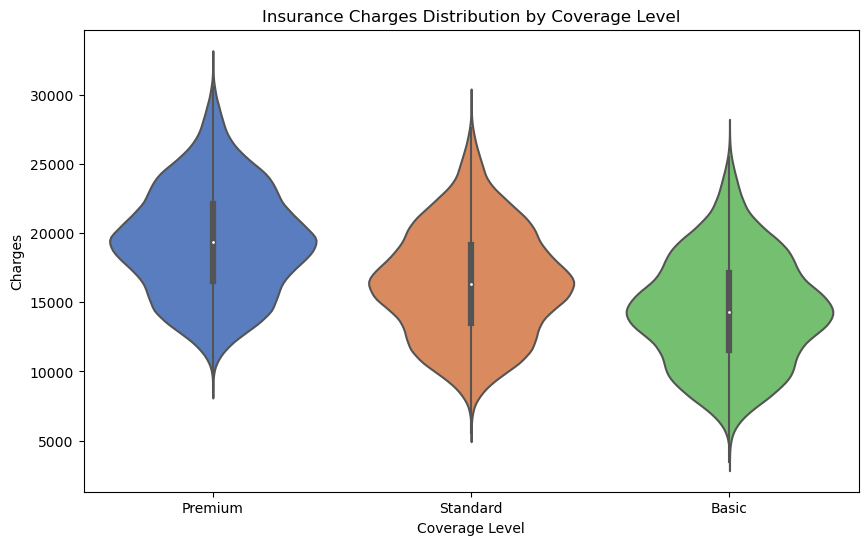

In [22]:
# Insurance charges distribution by coverage level
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='coverage_level', y='charges', palette='muted')
plt.title('Insurance Charges Distribution by Coverage Level')
plt.xlabel('Coverage Level')
plt.ylabel('Charges')
plt.show()

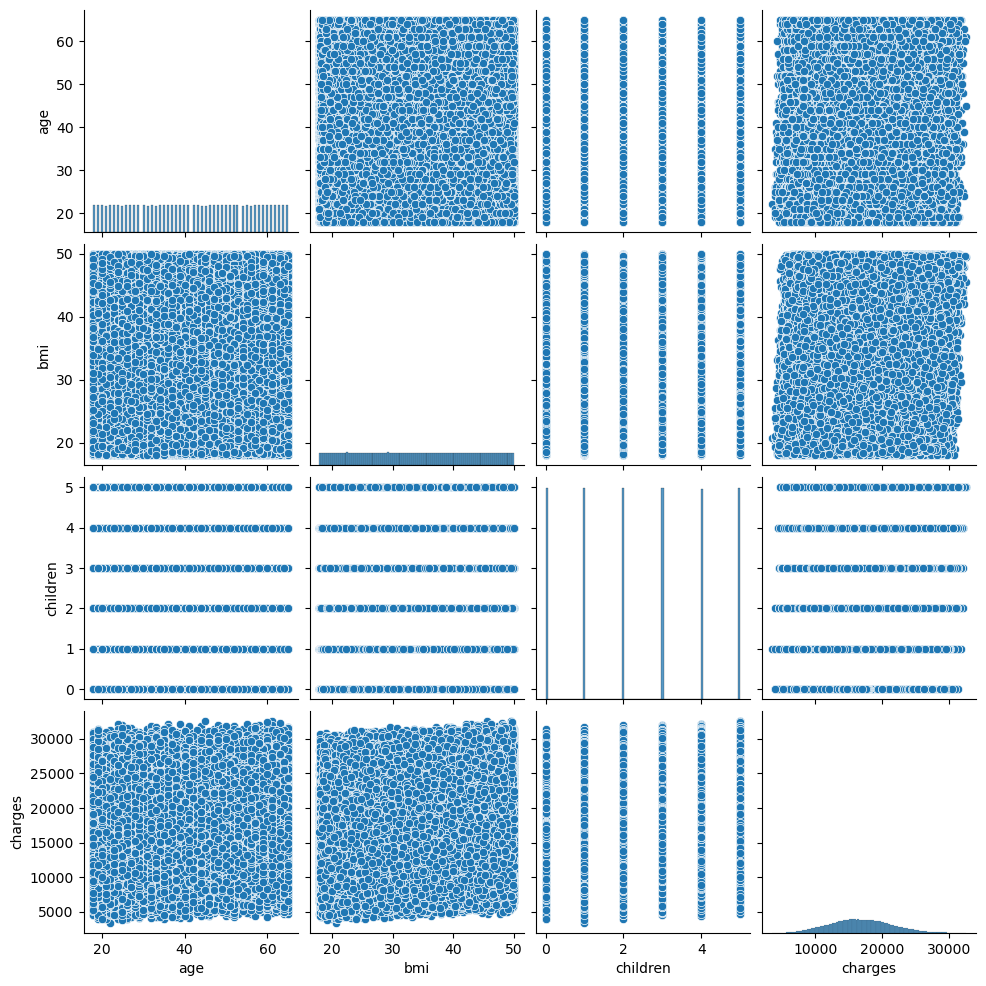

In [28]:
# Explore relationships between numerical variables using a pair plot
sns.pairplot(df[['age', 'bmi', 'children', 'charges']])
plt.show()

C:\Users\ayire\AppData\Local\Temp\ipykernel_26708\1779845392.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


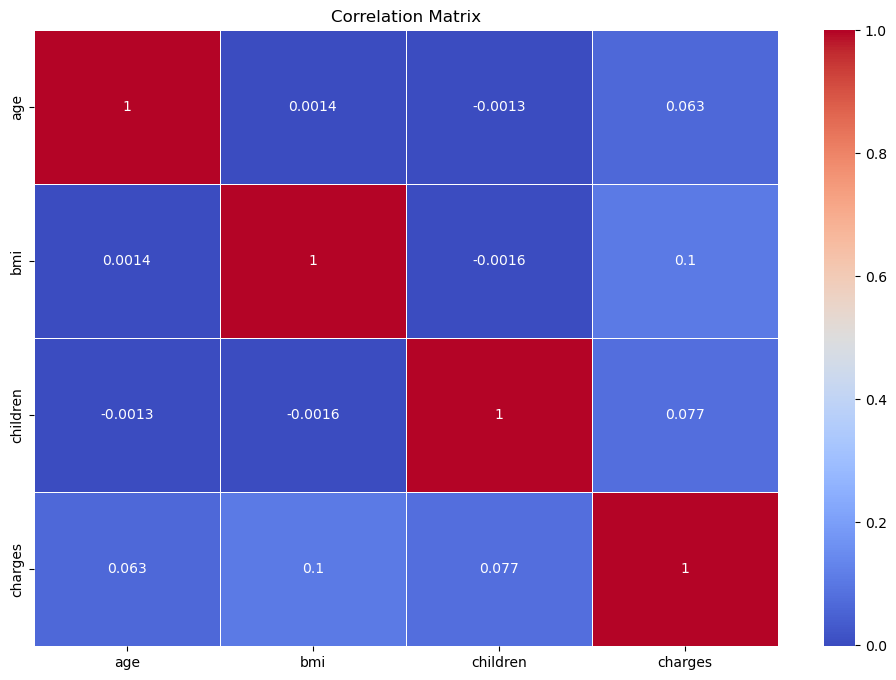

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
